# TP5 : Oscillateur de Van der Pol

### Consignes:
Ce TP est à rendre au plus tard dimanche 5 avril.
Vous essaierez d'être le plus précis possible pour les représenatations graphiques, en mettant des titres aux figures, des légendes sur les axes des abscisses et des ordonnées, et si besoin des labels associés aux courbes. 

On s'intéresse à un circuit oscillant de type RLC où le comportement de la résistance est non-linéaire et dépend d'un paramètre $\mu$. Le comportement physique du circuit est alors représenté par une équation différentielle du 2nd ordre du type:

$$\ddot U(t)-\omega_0f_\mu(U(t))\dot U(t)+\omega_0^2 U(t)=\omega_0X\cos(\omega t),$$

où l'inconnue $U$ est une tension, la fonction $f_\mu:x\mapsto \mu(1-x^2)$ décrit le comportement non linéaire du système, $\omega_0$ est la pulsation propre du système, et où le second membre $\omega_0X\cos(\omega t)$ correspond à une force d'excitation sinusoidale.

Le paramètre $\mu$ est réel et varie entre $-1$ et $1$. On le prend pour commencer égal à 1, et on fixe comme conditions initiales:

$$U(0)=0.5 \text{ et } \dot U(0)=1.$$

## 1 Oscillateur libre

On commence par considérer dans cette première partie que la force d'excitation est nulle, $X = 0$.

a) Mettre l'équation sous la forme d'un système d'équations du 1er ordre du type $\dot Y(t) = F_\mu(Y(t),t)$, en introduisant l'inconnue $I=\dot U$ et en posant $Y=(U,I)$.
Pour $\mu=0$, quelle est la solution exacte?

REPONSE QUESTION a) :
On a $$\dot Y(t) = \frac{d}{dt}
\begin{pmatrix}
U(t) \\ 
I(t)
\end{pmatrix}
=  F_\mu(Y(t),t)$$ avec  $$F_\mu(Z,t)= 
\begin{pmatrix}
Z_2 \\ 
\omega_0 f_\mu(Z_1) Z_2 - \omega_0^2 Z_1
\end{pmatrix}=
\begin{pmatrix}
Z_2 \\ 
\omega_0 \mu(1-Z_1^2) Z_2 - \omega_0^2 Z_1
\end{pmatrix}
$$

Pour $X = 0$ et $\mu = 0$ l'équation se simplifie en $\ddot U(t)+\omega_0^2 U(t)= 0$. On reconnaît l'équation de l'oscillateur harmonique. Les solutions sont à chercher sous la forme $U(t) = A cos(\omega_0 t) + B sin(\omega_0 t)$, où les constantes A et B sont déterminées grâce aux conditions initiales: $$U(0)=0.5 \text{ et } \dot U(0)=1.$$

Après calcul, on trouve donc:
$$ U(t) = 0.5 cos(\omega_0 t) + \frac{1}{\omega_0}sin(\omega_0 t)$$

On admet qu'il existe une solution globale de ce système sur $[0,+\infty[$.

b) Déterminer le(s) point(s) fixe(s) du système.

REPONSE QUESTION b) : Les points fixes sont les solutions de l'équation $$F_\mu(Z,t)=0$$ donc 
$Z_2=0$ et par suite $Z_1=0$. L'unique point fixe est donc $Z=0_{\mathbb{R}^2}$

c) Importer les fonctions et packages dont vous aurez besoin (math.pi, cos, etc... et numpy, scipy.linalg, scipy.integrate, matplotlib.pyplot...). Définir des constantes $\mathtt{mu}$ et $\mathtt{omega0}$, la condition initiale $\mathtt{Y0}$, et écrire des fonctions python $\mathtt{fmu}$ et $\mathtt{Fmu}$ qui correspondent aux fonctions de l'énoncé.

In [1]:
# cellule réponse

In [1]:
# cellule correction
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.integrate
from scipy.integrate import odeint

mu = 1
omega0 = 1
Y0 = np.array([0.5,1])

def fmu(x):
    return mu*(1-x**2)

def Fmu(Y,t):
    return np.array([Y[1],-omega0**2*Y[0]+omega0*fmu(Y[0])*Y[1]])

d) Définir une fonction $\mathtt{EulerExp(Y0,T,N)}$ qui à partir d'une condition initiale $Y_0$, d'un temps final $T$ et d'un nombre de subdivisions $N$ calcule l'approximation de la solution par la méthode d'Euler explicite.

In [3]:
# cellule réponse

In [2]:
# cellule correction
def EulerExp(Y0, T, N):
    dt = T/N
    
    Y = np.zeros((N+1,2))
    Y[0,:] = Y0
    
    for i in range(1,N+1):
        Y[i, :] = Y[i-1, :]+dt*Fmu(Y[i-1, :],dt*(i-1),)
    return Y

On prendra $T=100$ et $N$ suffisamment grand.

e) Calculer l'approximation de la solution avec les données $Y_0$, $T$ et $N$ proposées dans l'énoncé. Tracer ensuite dans deux repères différents mais dans la même figure, en utilisant subplot ou subplots, la tension $U$ et sa dérivée $I$ calculées numériquement en fonction du temps.

In [5]:
# cellule réponse

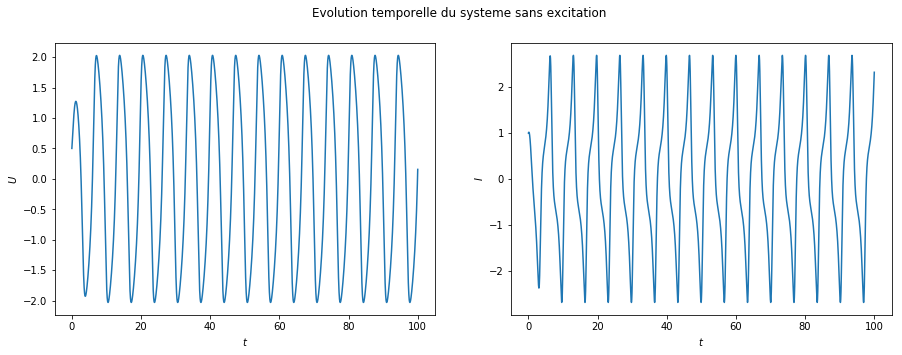

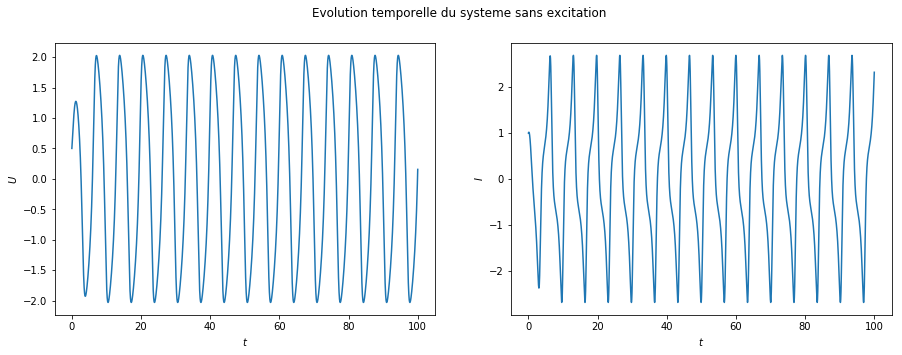

In [4]:
# cellule correction
N=10000
Y = EulerExp(Y0,100,N)
vt = np.linspace(0,100,N+1)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
ax1.plot(vt,Y[:,0])
ax1.set_xlabel('$t$')
ax1.set_ylabel('$U$')

ax2.plot(vt,Y[:,1])
ax2.set_xlabel('$t$')
ax2.set_ylabel('$I$')

fig.suptitle('Evolution temporelle du systeme sans excitation')
plt.show()

f) Quel comportement a la solution pour $t$ assez grand, par exemple $t\geq10$?

Text(0, 0.5, 'I')

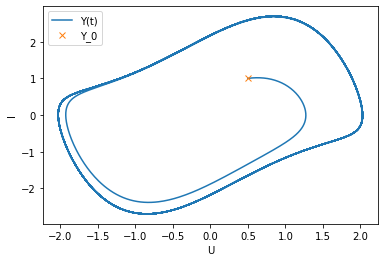

In [7]:
plt.plot(Y[:,0],Y[:,1],label='Y(t)')
plt.plot(Y0[0],Y0[1],'x',label='Y_0')
plt.legend()
plt.xlabel('U')
plt.ylabel('I')

REPONSE QUESTION f): Pour répondre à cette question il pouvait être utile de tracer la solution dans l'espace des phases (sans attendre que cela soit demandé). On s'apercevait alors que la solution tend rapidement vers un cycle limite.

g) Représenter dans l'espace des phases le champ de vecteurs associé à la solution, et la solution numérique obtenue pour chaque valeur de $\mu\in\{-1,-0.5,0,0.5,1\}$. On utilisera donc subplots pour diviser la figure en 5 repères.

Idée: Pour cela, on peut par exemple définir un dictionnaire qui à un repère donné de subplots associe une valeur de $\mu$.

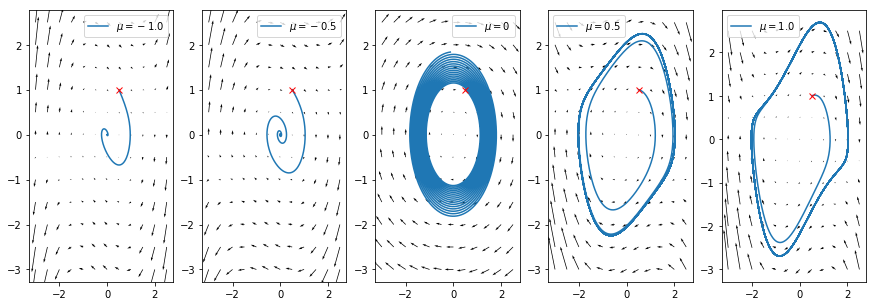

In [12]:
# cellule correction

fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5,figsize=(15, 5))
dico_mu = {ax1:-1.,ax2:-0.5,ax3:0,ax4:0.5,ax5:1.}

# Discrétisation d'un pavé
x1min    = -3
x1max    = 3
dx1      = 0.5
x1       = np.arange(x1min,x1max,dx1)
x2min    = -3
x2max    = 3
dx2      = 0.5
x2       = np.arange(x2min,x2max,dx2)
XX1,XX2  = np.meshgrid(x1, x2)

# Calcul et tracé du champ de vecteur et de la solution numérique pour chaque valeur de mu
for ax in dico_mu:
    mu = dico_mu[ax]
    Y =EulerExp(Y0,100,10000)
    
    Udot     = XX2
    Idot     = -omega0**2*XX1+omega0*mu*(1-XX1**2)*XX2

    # Plot la figure
    ax.quiver(XX1,XX2,Udot,Idot)
    ax.plot(Y[:,0],Y[:,1],label='$\mu={}$'.format(mu))
    ax.plot(Y0[0],Y0[1],'xr')
    ax.legend()

plt.show()

h) [Bonus] Trois comportements apparaissent, pour $\mu<0$, $\mu=0$ et pour $\mu>0$. Dans le cas $\mu>0$, comment interpréter ce cycle limite dans le portrait de phase par rapport au comportement des solutions (voir question 1.f)?

REPONSE QUESTION h): Trois comportements apparaissent,
<ul><li>
    pour $\mu<0$ la solution tend vers l'unique point fixe 0.
    <li> pour 

$\mu=0$ la solution est périodiue (même si ce n'est pas bien rendu par le schéma Euler Explicite, on l'a déjà vu dans le TP 4.
<li>
pour $\mu>0$ le système se place d'autant plus rapidement sur un cycle limite que 𝜇 est élevé. On constate comme déjà mentionné, que 𝑈(𝑡) oscille entre -2 et 2 tandis que 𝐼(𝑡) oscille périodiquement mais pas entre des bornes fixes.
    </ul>

i) On considère le schéma suivant
$$
Y_{n+1}=Y_n+hF_{\mu}\left(Y_n+\frac{h}{2}F_{\mu}(Y_n,t_n),t_n+\frac{h}{2}\right), \tag{S}
$$
pour approcher la valeur de $Y(t_n)$ au temps $t_n=n\frac{T}{N-1}$, pour $0\leq n\leq N-1$.
Quel est le nom de ce schéma?
Définir une fonction qui à partir d'une condition initiale $Y_0$, d'un temps final $T$ et d'un nombre de subdivisions $N$ calcule l'approximation de la solution en utilisant ce schéma.

REPONSE QUESTION i):

In [9]:
# cellule réponse

In [6]:
# cellule correction
def EulerMod(Y0, T, N):
    dt = T/N
    
    Y = np.zeros((N+1,2))
    Y[0,:] = Y0
    for i in range(1,N+1):
        Y[i, :] = Y[i-1, :]+dt*Fmu(Y[i-1, :]+(dt/2.)*Fmu(Y[i-1, :],dt*(i-1)),dt*(i-0.5))
    return Y

j) Définir une fonction $\mathtt{Erreur(Y0,T,N)}$ qui calcule $$E(N)=\left(\max_{n=0,\ldots,N-1}|Y(t_n)−Y^e_n|,\max_{n=0,\ldots,N-1}|Y(t_n)−Y^m_n|\right)\in \mathbb R^{N}\times\mathbb R^N,$$ où $Y(t_n)$, $Y^e_n$, et $Y^m_n$ sont les solutions obtenues avec le solveur python $\mathtt{odeint}$, Euler explicite et le schéma $(\text S)$ respectivement, sur une même subdivision $(t_n)_{n=0}^{N-1}$ et évaluées au temps $t_n$.

In [11]:
# cellule réponse

In [7]:
# cellule correction
def Erreur(T, N):
    Y_e = EulerExp(Y0, T, N) #solution avec Euler explicite
    Y_m = EulerMod(Y0,T,N) #solution avec Euler modifié
    
    vt = np.linspace(0,T,N+1)
    Y_odeint = odeint(Fmu,Y0,vt) #solution avec odeint
    
    err = np.array([np.max(np.abs(Y_e - Y_odeint)),np.max(np.abs(Y_m - Y_odeint))]) #erreur
    return err

In [8]:
# cellule correction
def Erreurbis(T, N):
    Y_e = EulerExp(Y0, T, N) #solution avec Euler explicite
    Y_m = EulerMod(Y0,T,N) #solution avec Euler modifié
    
    vt = np.linspace(0,T,N+1)
    Y_odeint = odeint(Fmu,Y0,vt,args=(),rtol = 1e-13,atol = 1e-13) #solution avec odeint
    
    err = np.array([np.max(np.abs(Y_e - Y_odeint)),np.max(np.abs(Y_m - Y_odeint))]) #erreur
    return err

In [9]:
E=Erreur(1,5)
print(E)

[0.11269788 0.00721088]


k) Pour chaque valeur de $\mu\in\{-1,0,1\}$, en utilisant subplots et un dictionnaire comme en 1.g, tracer dans un même repère en échelle log-log les composantes $E_e(N)$ et $E_m(N)$ de l'erreur définie ci-dessus en fonction de $N$. On prendra cette fois-ci comme temps final $T=10$, et on évaluera ces erreurs pour $N=100, 1 000, 10 000$ et $100 000$.
Tracer de plus les courbes $y=1/N$ et $y=1/N^2$ dans chaque repère.

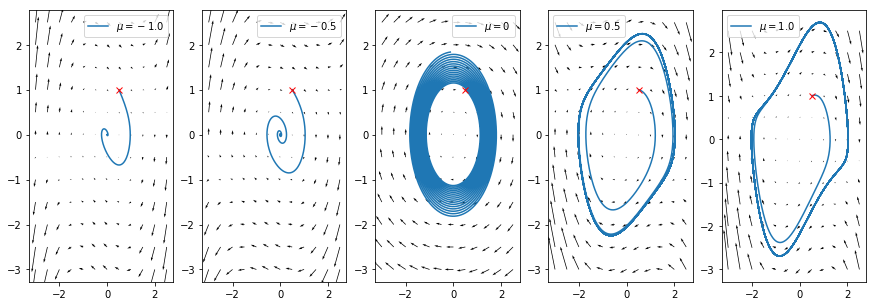

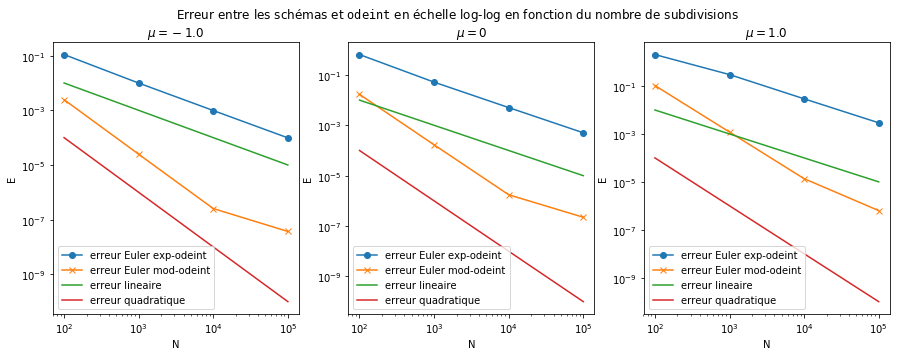

In [10]:
# cellule correction

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 5))
vN = [10**(i+2) for i in range(4)] # create list of powers of 10

dico_mu = {ax1:-1.,ax2:0, ax3:1.}
T = 10

for ax in dico_mu:
    mu = dico_mu[ax]
    E_e = []
    E_m = []
    E_1=[]
    E_2=[]

    for N in vN:
        Err = Erreur(T, N)
        E_e.append(Err[0])
        E_m.append(Err[1])
        E_1.append(1/(N))
        E_2.append(1/(N**2))

    ax.plot(vN, E_e, '-o', label='erreur Euler exp-odeint')
    ax.plot(vN, E_m, '-x', label='erreur Euler mod-odeint')
    ax.plot(vN, E_1, label='erreur lineaire')
    ax.plot(vN, E_2, label='erreur quadratique')    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('N')
    ax.set_ylabel('E')
    ax.legend(loc=0)
    ax.set_title('$\mu={}$'.format(mu))
    
fig.suptitle('Erreur entre les schémas et $\mathtt{odeint}$ en échelle log-log en fonction du nombre de subdivisions')
plt.show()

l) Quel est le comportement de l'erreur entre l'approximation par Euler explicite et l'approximation calculée par $\mathtt{odeint}$?

REPONSE QUESTION l): On admet ici que odeint renvoie  une solution très proche de la solution exacte. L'erreur entre cette solution et celle calculée par Euler Explicite suit une erreur en $1/N$ comme celle attendue théoriquement.

m) Quel est le comportement de l'erreur entre l'approximation par le schéma $(\text S)$ et l'approximation calculée par $\mathtt{odeint}$? Est-ce étonnant?

REPONSE QUESTION m): EulerModifié suit d'abord une erreur en $1/N^2$ avant de poursuivre en $1/N$ (ou quelque chose d'intermédiaire pour le cas $\mu = 1$) à partir de $10^4$. On devrait s'attendre à ce que Eulermodifé reste en $1/N^2$, donc ce changement de régime est en effet étonnant. 

REMARQUE: si l'on force odeint à aller à sa précision maximale, en ajoutant les options $rtol = 1e-13$ et $atol = 1e-13$ (voir la ligne mise en commentaire dans def Erreur plus haut), alors ce changement de régime disparaît, ce qui laisse penser que Eulermodifié est bel et bien en $1/N^2$ et que la formule utilisée pour le calcul d'erreur est en fait entachée de l'erreur commise par le solveur odeint, solveur qui bien entendu n'est pas exact.


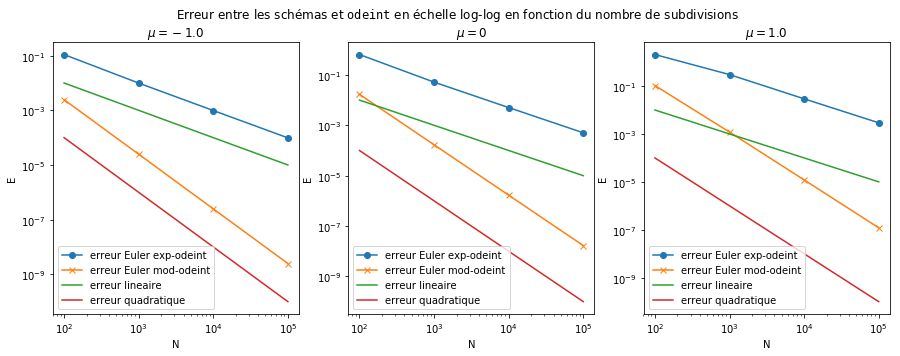

In [13]:
# cellule correction

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15, 5))
vN = [10**(i+2) for i in range(4)] # create list of powers of 10

dico_mu = {ax1:-1.,ax2:0, ax3:1.}
T = 10

for ax in dico_mu:
    mu = dico_mu[ax]
    E_e = []
    E_m = []
    E_1=[]
    E_2=[]

    for N in vN:
        Err = Erreurbis(T, N)
        E_e.append(Err[0])
        E_m.append(Err[1])
        E_1.append(1/(N))
        E_2.append(1/(N**2))

    ax.plot(vN, E_e, '-o', label='erreur Euler exp-odeint')
    ax.plot(vN, E_m, '-x', label='erreur Euler mod-odeint')
    ax.plot(vN, E_1, label='erreur lineaire')
    ax.plot(vN, E_2, label='erreur quadratique')    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('N')
    ax.set_ylabel('E')
    ax.legend(loc=0)
    ax.set_title('$\mu={}$'.format(mu))
    
fig.suptitle('Erreur entre les schémas et $\mathtt{odeint}$ en échelle log-log en fonction du nombre de subdivisions')
plt.show()

n) Modifier la fonction $\mathtt{Erreur}$ en une fonction $\mathtt{Erreur}\_\mathtt{bis}$ pour que la solution calculée avec $\mathtt{odeint}$ soit obtenue sur une subdivision $(t_n)_{n=0}^{1000 N}=(n\frac{T}{1000 N -1})$. Faire attention à bien évaluer les différences entre la solution obtenue avec $\mathtt{odeint}$ et les schémas d'Euler explicite et $(\text S)$ à des temps similaires. Puis tracer les mêmes courbes qu'à la question k.

Idée: utiliser $\mathtt U[:\,\,:\mathtt k]$ permet de ne sélectionner qu'un élément sur $\mathtt k$ du vecteur $\mathtt U$.

# cellule reponse 
Cette question était mal posée, car elle introduisait un décalage dans les pas de temps. La bonne manière d'augmenter la précision de la solution calculée par odeint est d'utiliser les arguments optionnels pour diminuer la tolérance sur l'erreur absolue et relative.

o) [Bonus] Que remarque-t-on cette fois-ci à propos du comportement des erreurs?

REPONSE QUESTION o):

## 2 Oscillateur forcé

On regarde maintenant ce qu'il se passe lorsque le système est excité par une force sinusoïdale. On pose $X = 4$ et $\omega=\pi$.

a) Adapter la fonction $\mathtt{Fmu}$ en une fonction $\mathtt{Fmu}\_\mathtt{bis}$ qui prend en compte le second membre, et définir les constantes $X$ et $\omega$.

In [17]:
# cellule réponse

In [14]:
# cellule correction
def Fmu_bis(Y,t):
    return np.array([Y[1],-omega0**2*Y[0]+omega0*fmu(Y[0])*Y[1]+omega0*X*np.cos(omega*t)])

X = 4
mu=-0.25
omega = math.pi
omega0=1.


b) Adapter la fonction $\mathtt{EulerExp}$ en une fonction $\mathtt{EulerExp}\_\mathtt{bis}$ qui correspond à $\mathtt{Fmu}\_\mathtt{bis}$.
Calculer l'approximation numérique de la solution, avec toujours la même condition initiale $Y_0$, $T=100$ et $N$ suffisamment grand.
Tracer dans deux repères différents mais dans la même figure la tension $U$ et sa dérivée $I$ calculées numériquement en fonction du temps.

In [22]:
# cellule réponse

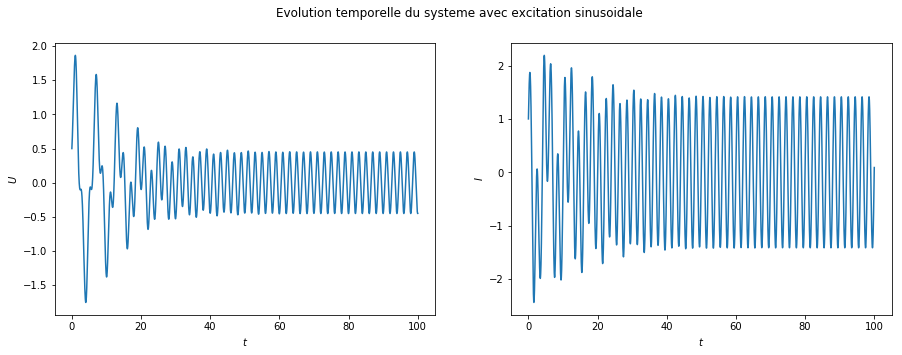

In [15]:
# cellule correction
def EulerExp_bis(Y0, t0,T, N):
    dt = T/N
    
    Y = np.zeros((N+1,2))
    Y[0,:] = Y0
    
    for i in range(1,N+1):
        Y[i, :] = Y[i-1, :]+dt*Fmu_bis(Y[i-1, :],t0+dt*(i-1))
    return Y

Y0 = np.array([0.5,1])
N=10000
T=100
Y = EulerExp_bis(Y0,0,T,N)
vt = np.linspace(0,T,N+1)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 5))
ax1.plot(vt,Y[:,0])
ax1.set_xlabel('$t$')
ax1.set_ylabel('$U$')

ax2.plot(vt,Y[:,1])
ax2.set_xlabel('$t$')
ax2.set_ylabel('$I$')

fig.suptitle('Evolution temporelle du systeme avec excitation sinusoidale')
plt.show()

c) Peut-on tirer la même conclusion que dans la question 1.f sur le comportement de la solution?

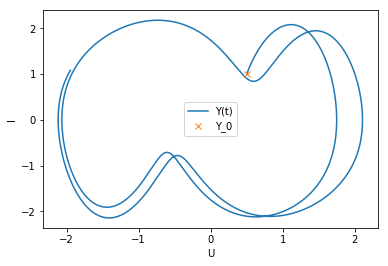

In [21]:
plt.plot(Y[:,0],Y[:,1],label='Y(t)')
plt.plot(Y0[0],Y0[1],'x',label='Y_0')
plt.legend()
plt.xlabel('U')
plt.ylabel('I')
plt.show()

REPONSE QUESTION c): là encore il est utilise de tracer la solution dans l'espace des phases comme ci-dessus. Suivant les valeurs de $\mu$ la solution tend vers un cycle limite ou pas.

d) Définir une fonction $\mathtt{EulerExp}\_\mathtt{3T}(Y0,T,N)$ qui calcule l'approximation de la solution $Y$ correspondant à la condition initiale $Y_0$ sur l'intervalle $[0,T]$, la solution $Z$ correspondant à la condition initiale $Z_0=Y(T)$ sur l'intervalle $[T,2T]$, et la solution $W$ correspondant à la condition initiale $W_0=Z(T)$ sur l'intervalle $[2T,3T]$.
L'approximation par Euler explicite de la solution correspondant à la condition initiale $Y_0$ sur l'intervalle $[0,3T]$ est alors définie par
$$t\mapsto
\left|\begin{array}{lr}
Y(t)& 0\leq t\leq T\\
Z(t-T)& T\leq t\leq 2T\\
W(t-2T)& 2T\leq t\leq 3T
\end{array}\right..$$

In [25]:
# cellule réponse
def EulerExp_3T(Y0,T,N):
    ...
    return Y,Z,W

In [18]:
# cellule correction
def EulerExp_3T(Y0,T,N):
    Y = EulerExp_bis(Y0,0,T,N)
    
    Z0 = Y[-1,:]
    Z = EulerExp_bis(Z0,T,T,N)
    
    W0 = Z[-1,:]
    W = EulerExp_bis(W0,2*T,T,N)
    
    return Y,Z,W

e) Représenter dans l'espace des phases (mais sans le champ de vecteurs cette fois) la courbe de la solution numérique obtenue pour chaque valeur de $\mu\in\{-1,-0.5,0,0.5,1\}$, pour $T=10$ et $N=1000$. On tracera en bleu la courbe de $Y$ (pour $0\leq t\leq 10$), en rouge la courbe de $Z$ (pour $10\leq t\leq 20$) et en vert la courbe de W (pour $20\leq t\leq 30$).

In [27]:
# cellule réponse

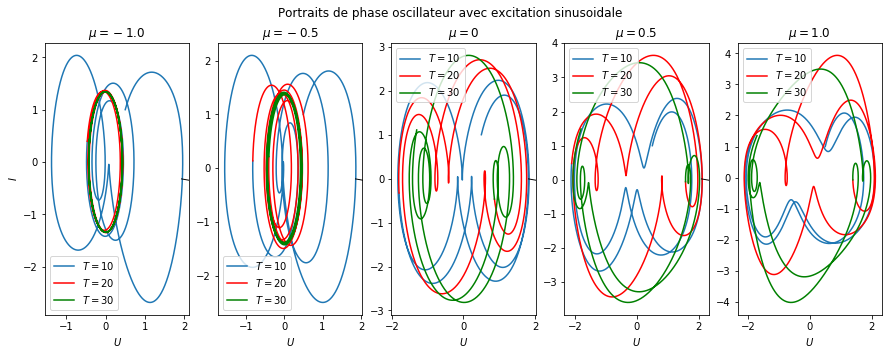

In [20]:
# cellule correction
fig, ax = plt.subplots(1,5,figsize=(15, 5))
vmu=[-1.,-0.5,0,0.5,1.]
X=4
Y0 = np.array([0.5,1])
T=10
N=10000
vt3=np.linspace(0,3*T,3*N+1)
for i,mu in enumerate(vmu):
    Y,Z,W = EulerExp_3T(Y0,T,N)
    #Yode = odeint(Fmu_bis,Y0,vt3,args=(),rtol = 1e-13,atol = 1e-13)

    
    # Plot la figure
    ax[i].plot(Y[:,0],Y[:,1],label='$T=${}'.format(10))
    ax[i].plot(Z[:,0],Z[:,1],label='$T=${}'.format(20),color='r')
    ax[i].plot(W[:,0],W[:,1],label='$T=${}'.format(30),color='g')
    #ax[i].plot(Yode[:,0],Yode[:,1],label='odeint',color='k')
    ax[i].set_xlabel('$U$')
    ax[i].set_ylabel('$I$')
    ax[i].set_title('$\mu={}$'.format(mu))
    ax[i].legend()
    
fig.suptitle('Portraits de phase oscillateur avec excitation sinusoidale')
plt.show()

f) Commentez ces résultats: observe-t-on des points fixes ou des cycles limite?

REPONSE QUESTION f): 
Pour $\mu<0$ la solution semble tendre vers un cycle limite alors que pour $\mu\geq 0$ ce n'est pas le cas


g) [Bonus] Pour mettre en évidence le caractère  d'une trajectoire, on peut utiliser sa $\textit{section de Poincaré}$ avec la demi-droite $\{(0,y),y\geq0\}$: l'intersection de cette demi-droite et d'une trajectoire $Y(t)=(U(t),I(t))$ partant d'un point initial $Y_0$ pour $t\in [0,T]$ avec $T$ grand. On peut alors définir la suite $(I_n)_{n\geq0}$ des valeurs de l'ordonnée qui correspondent à une abscisse $U=0$ : $I_0$ correspond à la première fois qu'on croise la demi-droite, $I_1$ à la seconde, etc...
Tracer cette suite pour $X=0$ et pour $X=4$, pour différentes valeurs de $\mu$, et commenter.

# cellule réponse
Si cette suite prend un nombre fini de valeurs cela indique que le trajectoire  est périodique.
Si cette suite converge vers un nombre fini de valeurs $I_*$, c'est que la trajectoire  tend vers un cycle limite.
Si cette suite de points n'a aucune structure cela indique que la solution est chaotique.

Pour $X=4$ et $\mu<0$ on repère bien le cycle limite. Pour $\mu=0$, 0.25 et 0.5 la suite  ne semble pas avoir un nombre fini de valeurs et le comportement est donc apériodique. Pour $\mu=0.75$ et $\mu=1$  le cycle limite met beaucoup plus longtemps à apparaître 

Pour $X=0$ on peut faire l'expérience pour les valeurs de $\mu\geq 0$ on retrouve bien les observations faites à la question 1h) modulo le fait que le schéma d'Euler n'est pas suffisamment précis pour retrouver la valeur de la période dans le cas $\mu=0$


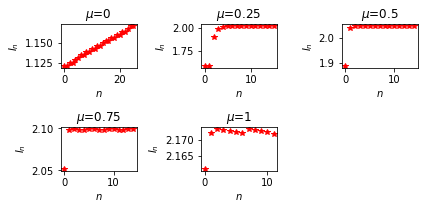

In [30]:
# cellule correction
T = 100
N = 100000
Y0 = np.array([0.5,1])

X = 0
jplot=0
for mu in [0,0.25,0.5,0.75,1]:
    jplot=jplot+1
    Y = EulerExp_bis(Y0,0,T,N)
    plt.subplot(3,3,jplot)
    
    j=0
    for k in range(N):
        if np.abs(Y[k,0])<1e-3:
            if Y[k,1]>=0:
                plt.plot(j,Y[k,1],marker='*',color='red')
                j+=1
    plt.xlabel('$n$')
    plt.ylabel('$I_n$')

    plt.title('$\mu$={}'.format(mu,X))
    plt.tight_layout()
    


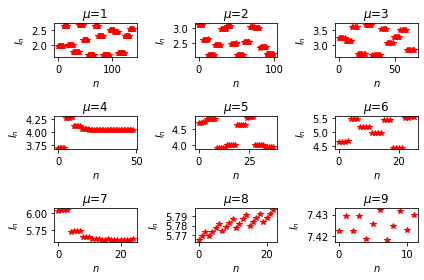

In [32]:
# cellule correction
T = 100
N = 1000000
Y0 = np.array([0.5,1])

X = 1.2

jplot=0
#for mu in [-1.,-0.75,-0.5,-.25,0,0.25,0.5,0.75,1]:
for mu in range(1,10):
    jplot=jplot+1
    Y = EulerExp_bis(Y0,0,T,N)
    plt.subplot(3,3,jplot)
    
    j=0
    for k in range(N):
        if np.abs(Y[k,0])<1e-3:
            if Y[k,1]>=0:
                plt.plot(j,Y[k,1],marker='*',color='red')
                j+=1
    plt.xlabel('$n$')
    plt.ylabel('$I_n$')

    plt.title('$\mu$={}'.format(mu,X))
    plt.tight_layout()
    
